# Auto MPG Data Set

##### Informação do conjunto de dados
Os dados referem-se ao consumo de combustível do ciclo da cidade em milhas por galão, a ser previsto em termos de 3 atributos discretos multivalorados e 5 atributos contínuos

##### Os atributos são:
* MPG ( Continuo )
* Cilindradas ( discreto multivalorado )
* Deslocamento ( Continuo )
* Cavalos de Potência ( Continuo )
* Peso ( Continuo )
* Aceleração ( Continuo )
* Ano modelo ( discreto multivalorado )
* Origem ( discreto multivalorado )
* Nome do Carro ( string (única para cada instância) )

## Importando as bibliotecas ##

In [1]:
# instalar a biblioteca <minsom> *no Anaconda Prompt digite <> pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np

## Carregando os dados

In [2]:
base = pd.read_csv('cars.csv')

In [3]:
base.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
base.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Camada de entrada e rótulos para validação

In [5]:
X = base.iloc[:,0:8].values
y = base.iloc[:,7].values

### Normalização dos dados

In [6]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

### Construção do SOM

In [7]:
som = MiniSom(x = 10, y = 10, input_len = 8, sigma = 1.0, learning_rate = 0.9, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100000)

#### Topologia da Rede

In [8]:
som._activation_map

array([[0.76611153, 0.70173895, 0.41847608, 0.58634717, 0.65314423,
        0.74848533, 0.64486812, 0.53968786, 0.6100139 , 0.70834213],
       [0.6733723 , 0.58758775, 0.12257828, 0.22512154, 0.55061393,
        0.68947612, 0.66216738, 0.52995169, 0.64206944, 0.67928085],
       [0.51454343, 0.54290166, 0.3758515 , 0.39110925, 0.56686996,
        0.71840709, 0.59079091, 0.55189903, 0.56297236, 0.69547089],
       [0.65104064, 0.55599497, 0.2309507 , 0.16049523, 0.28961833,
        0.57287869, 0.79448844, 0.79731117, 0.66435491, 0.56009605],
       [0.70727351, 0.58201059, 0.39392635, 0.38088932, 0.65549797,
        0.66909369, 0.644099  , 0.75696149, 0.77358908, 1.32676988],
       [0.72176999, 0.71450044, 0.62857534, 0.46118539, 0.48550951,
        0.62925875, 1.0473677 , 1.21342705, 1.22549315, 1.25213036],
       [0.67845035, 0.65507318, 0.81528469, 0.88540945, 0.95617024,
        1.08970385, 1.42954737, 1.52890232, 1.37969046, 1.33027984],
       [0.80327621, 0.98160686, 0.8773637

##### Pesos do SOM

In [9]:
som._weights

array([[[3.29172097e-01, 2.00000000e-01, 1.60887690e-01, 1.92002960e-01,
         2.01860556e-01, 6.79481881e-01, 1.46764083e-01, 3.85644092e-11],
        [4.19404727e-01, 2.00000000e-01, 1.41134808e-01, 2.16579710e-01,
         1.82731645e-01, 4.56854426e-01, 1.24443929e-01, 3.59849153e-05],
        [4.32384944e-01, 2.00000066e-01, 1.09556061e-01, 1.95565928e-01,
         1.99225838e-01, 4.78643316e-01, 2.59201280e-01, 3.06194089e-01],
        [3.85909023e-01, 2.00000000e-01, 1.16983595e-01, 2.09042951e-01,
         2.82086566e-01, 5.93063355e-01, 9.23199989e-02, 4.99999998e-01],
        [4.18907434e-01, 2.00000000e-01, 7.44680083e-02, 3.64491785e-02,
         1.30317023e-01, 8.07275544e-01, 1.17716487e-01, 5.02342721e-01],
        [6.21727709e-01, 1.99999999e-01, 1.37700399e-02, 1.17000249e-01,
         3.34960669e-02, 6.23439709e-01, 8.70559057e-02, 9.89322921e-01],
        [5.98274032e-01, 2.00000000e-01, 2.16150835e-02, 1.01966203e-01,
         7.69662225e-02, 6.91819567e-01, 3.37

## Vizualização de dados

In [10]:
q = som.activation_response(X)
q

array([[ 5.,  6.,  0.,  5.,  6.,  2.,  4.,  7.,  3.,  2.],
       [ 2.,  6.,  5., 12.,  4.,  8.,  2.,  3., 10.,  6.],
       [ 5.,  5.,  3.,  5.,  4.,  2.,  4.,  6.,  4.,  5.],
       [ 5.,  5.,  0.,  3.,  1.,  1.,  3.,  3.,  5.,  0.],
       [10.,  5.,  0.,  6.,  4.,  3.,  1.,  3.,  0.,  2.],
       [ 6.,  2.,  4.,  0.,  0.,  2.,  0.,  2.,  7.,  2.],
       [ 3.,  0.,  2.,  8.,  5.,  0.,  8.,  4.,  9.,  7.],
       [ 3.,  1.,  4.,  2.,  7.,  4.,  5.,  2.,  3.,  5.],
       [ 1.,  5.,  7.,  6.,  0.,  5.,  2.,  3.,  6.,  3.],
       [ 2.,  3.,  6.,  3.,  8.,  7.,  5.,  5.,  4.,  3.]])

### MID - distância média entre neurônios

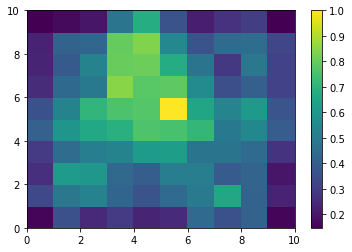

In [11]:
from matplotlib.pylab import pcolor, colorbar, plot, plt
pcolor(som.distance_map().T)
# MID - mean inter neuron distance
colorbar()

### Regiões de ativação (classe)

In [12]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

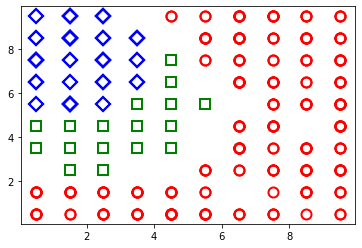

In [13]:
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [14]:
w = som.winner(X[148])

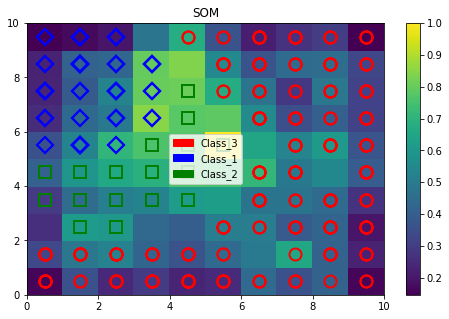

In [15]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Class_3')
blue_patch = mpatches.Patch(color='blue', label='Class_1')
green_patch = mpatches.Patch(color='green', label='Class_2')


plt.figure(figsize=(8,5))
plt.title('SOM')
plt.pcolor(som.distance_map().T) # distance map as background
plt.colorbar()

for cnt,xx in enumerate(X):
    w = som.winner(xx) # getting the winner
    plt.plot(w[0]+.5,w[1]+.5,markers[y[cnt]],markerfacecolor='None',
             markeredgecolor=color[y[cnt]],markersize=12,markeredgewidth=2)
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch,green_patch])
plt.show() # show the figure